In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (15, 10))

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['master.csv']


In [4]:
# Reading the dataset file
df = pd.read_csv("../input/master.csv")

In [5]:
# Displaying the first 5 rows of the DataFrame
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [6]:
# Data type in each column
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [7]:
# Number of rows and columns in the DataFrame
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 27820
Number of columns: 12


Analysing the total of suicides per country (1985 - 2016)

In [8]:
new_df = pd.DataFrame(df.groupby('country').sum()['suicides_no'].sort_values(ascending=False).reset_index())
analysing_total = new_df.head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

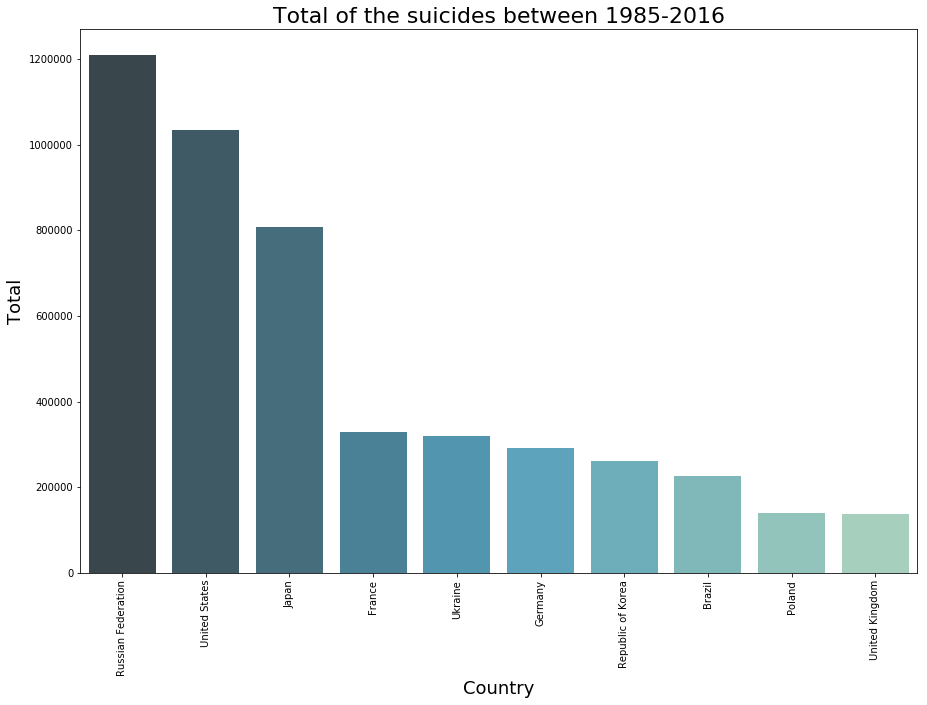

In [9]:
figure = sns.barplot(x = 'country', y = 'suicides_no', data = analysing_total, palette="GnBu_d")
figure.set_title('Total of the suicides between 1985-2016', {'fontsize': 22})
figure.set_xlabel('Country', {'fontsize': 18})
figure.set_ylabel('Total', {'fontsize': 18})
plt.rcParams["xtick.labelsize"] = 3
plt.xticks(rotation= 90)

Analysing of suicies in Russian Federation and Germany (1985 - 2016)

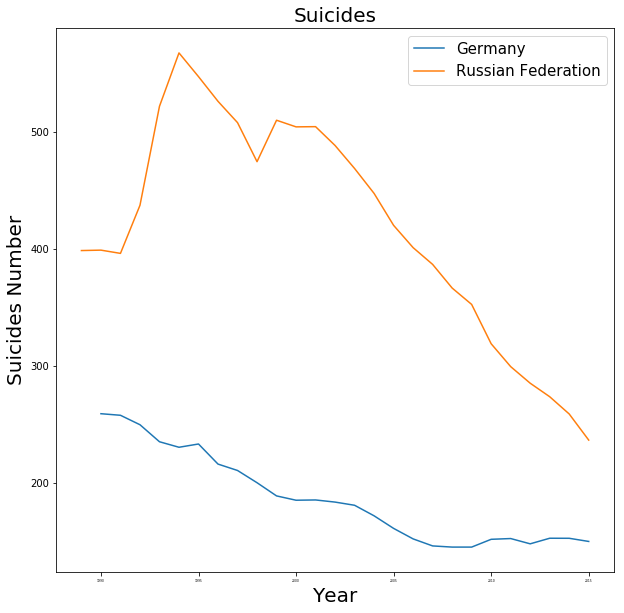

In [10]:
countries_r_g = ['Russian Federation', 'Germany']
df_ne = df[df['country'].isin(countries_r_g)]
ax = df_ne.groupby(['country', 'year'])['suicides/100k pop'].sum().unstack('country').plot(figsize=(10, 10))
ax.set_title('Suicides', fontsize=20)
ax.legend(fontsize=15)
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Suicides Number', fontsize=20)
ax

Suicides per 100k population

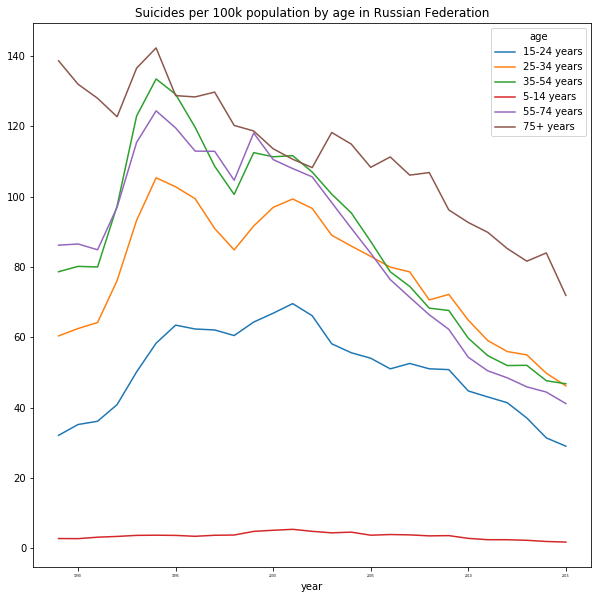

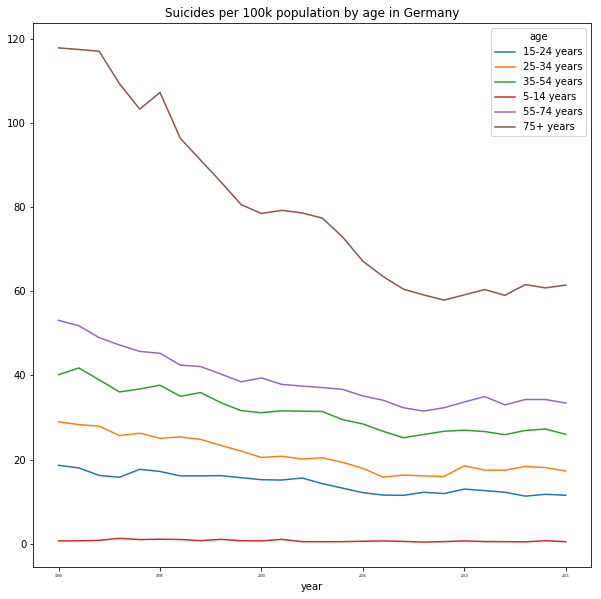

In [11]:
countries_r_g = ['Russian Federation', 'Germany']
for country in countries_r_g:
    grouped = df[df['country'] == country].groupby(['year', 'age'])['suicides/100k pop'].sum().unstack('age')
    grouped.plot(figsize=(10, 10),
               title='Suicides per 100k population by age in ' + country,
               legend=True)

**Population of different countries**

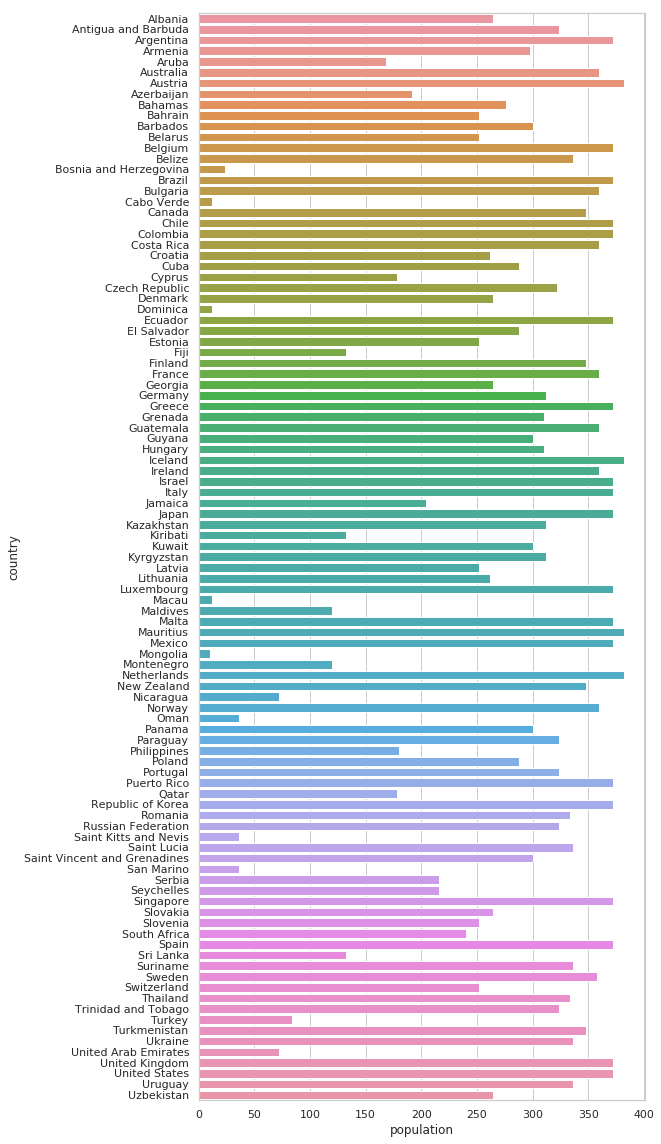

In [12]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(8, 20))
ax = sns.barplot(df.population.groupby(df.country).count(),df.population.groupby(df.country).count().index)
plt.show()

**Distribution of suicides/100k pop**

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


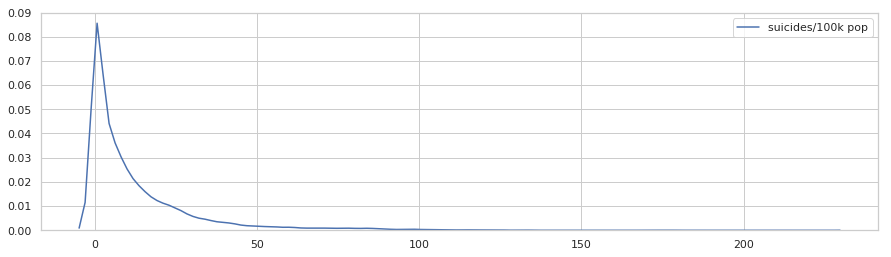

In [13]:
f,ax = plt.subplots(1,1,figsize=(15,4))
ax = sns.kdeplot(df['suicides/100k pop'])
plt.show()

**distribution of men and women by age**

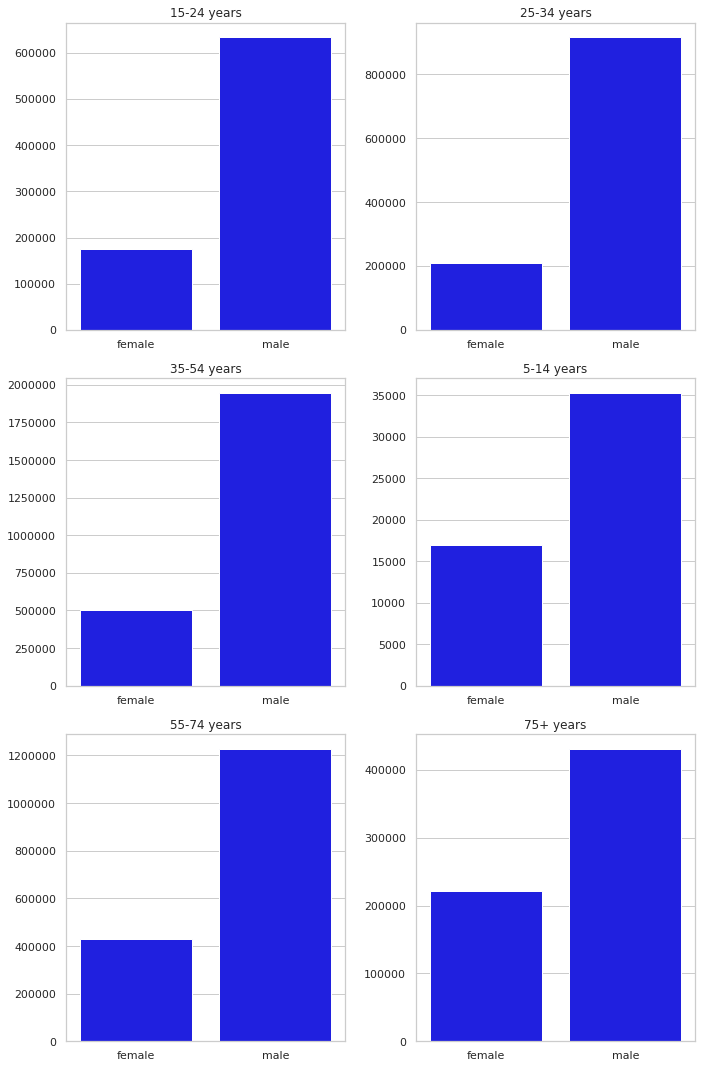

In [14]:
female_=[175437,208823,506233,16997,430036,221984]
male_=[633105,915089,1945908,35267,1228407,431134]
plot_id = 0
for i,age in enumerate(['15-24 years','25-34 years','35-54 years','5-14 years','55-74 years','75+ years']):
    plot_id += 1
    plt.subplot(3,2,plot_id)
    plt.title(age)
    fig, ax = plt.gcf(), plt.gca()
    sns.barplot(x=['female','male'],y=[female_[i],male_[i]],color='blue')
    plt.tight_layout()
    fig.set_size_inches(10, 15)
plt.show()  

**All data were analyzed. Graphical analysis was performed for all age rates for suicide rates.**

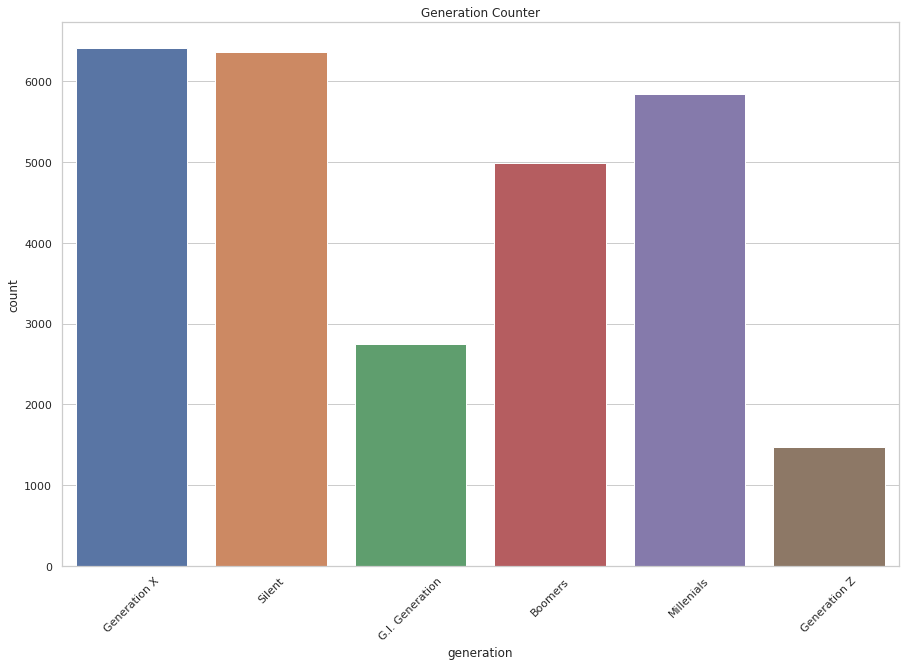

In [17]:
sns.countplot(df.generation)
plt.title('Generation Counter')
plt.xticks(rotation=45)
plt.show()

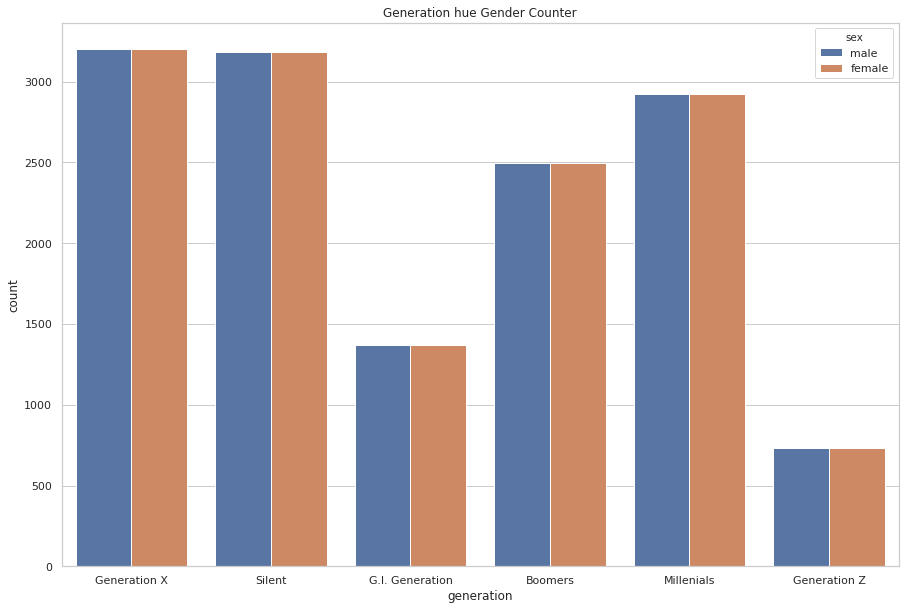

In [21]:
sns.countplot(df.generation,hue=df.sex)
plt.title('Generation hue Gender Counter')
plt.show()